## Observations and Insights 

1.) Capomulin and Ramicane have the highest number of observed data points and the lowest averge tumor volume among all drugs       tested.

2.) There is a strong correlation between weight and tuor volume, and the r^2 (0.7) indicates that as weight increase the tumor     size also increases. 

3.) The mean tumor size for Capomulin (40.7) and Ramicane (40.2) is the lowest of the drugs. There are no ouliers for either d     data set to indicate that this number is skewed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# test

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#check for repeating values in Mouse ID
len(mouse_metadata["Mouse ID"].unique())

#study_results
#mouse_metadata
#study_results

# Combine the data into a single dataset

combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID', )

# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_data_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# concatenate Mouse Id and Timepoint to find duplicates
combined_data_df["MouseID_Timepoint"] = combined_data_df["Mouse ID"].map(str) + combined_data_df["Timepoint"].map(str)

#find the number of duplicated MouseID and Timepoint
combined_data_df["MouseID_Timepoint"].duplicated().sum()


#show these duplicted values.......There are five rows that have the same mouse ID and timepoint
combined_data_df["MouseID_Timepoint"].loc[combined_data_df["MouseID_Timepoint"].duplicated()]

# another way to check without adding a new column.  didn;t know you could do this, Or I would not ahve added new column
#combined_data_df.duplicated(subset = ["MouseID_Timepoint"]).sum()

909     g9890
911     g9895
913    g98910
915    g98915
917    g98920
Name: MouseID_Timepoint, dtype: object

In [4]:
#Remove duplicates, and store in new DF

# Optional: Get all the data for the duplicate mouse ID.
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.drop_duplicates(subset=["MouseID_Timepoint"])

#change index value 
clean_df = clean_df.set_index("MouseID_Timepoint")
clean_df

#car_data = car_data.set_index('car name')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
MouseID_Timepoint,,,,,,,,
k4030,k403,Ramicane,Male,21,16,0,45.000000,0
k4035,k403,Ramicane,Male,21,16,5,38.825898,0
k40310,k403,Ramicane,Male,21,16,10,35.014271,1
k40315,k403,Ramicane,Male,21,16,15,34.223992,1
k40320,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
z96925,z969,Naftisol,Male,9,30,25,63.145652,2
z96930,z969,Naftisol,Male,9,30,30,65.841013,3
z96935,z969,Naftisol,Male,9,30,35,69.176246,4


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stnd_dv = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"MEAN": mean, "MEDIAN": median, "VARIANCE": variance, "STND_DEV": stnd_dv, "SEM": sem})
summary_df


,MEAN,MEDIAN,VARIANCE,STND_DEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Each Treatment Regimen')

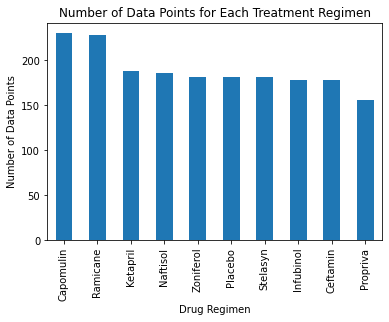

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_bar = clean_df["Drug Regimen"].value_counts().plot.bar(width =0.5)

# Set labels 
drug_bar.set_xlabel("Drug Regimen")
drug_bar.set_ylabel("Number of Data Points")
drug_bar.set_title("Number of Data Points for Each Treatment Regimen")

#drug_bar.count().head(10)

([<matplotlib.axis.XTick at 0x1413ac13790>,
 [Text(0, 0, '230'),
  Text(1, 0, '178'),
  Text(2, 0, '178'),
  Text(3, 0, '188'),
  Text(4, 0, '186'),
  Text(5, 0, '181'),
  Text(6, 0, '156'),
  Text(7, 0, '228'),
  Text(8, 0, '181'),
  Text(9, 0, '182')])

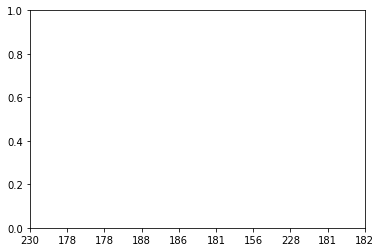

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count_mice_treat = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
#count_mice

drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

x_axis = np.arange(len(count_mice_treat))
Y_Axis_value = [value for value in count_mice_treat]



tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Y_Axis_value)

#plt.title("Number of Mice per Treatment",fontsize = 20)
#plt.xlabel("Drug Regimen",fontsize = 14)
#plt.ylabel("Number of Mice",fontsize = 14)



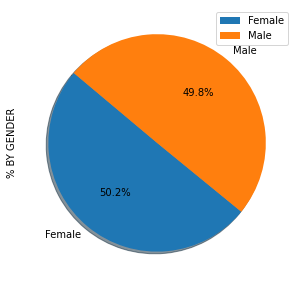

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_mice = clean_df["Mouse ID"].nunique()
gender_group = clean_df.groupby(["Sex"])
#gender_group.count().head(20)
gender_count = gender_group["Mouse ID"].nunique()
#gender_count

percent_by_gender = total_mice/ gender_count *100

gender_bar_df = pd.DataFrame({"% BY GENDER":percent_by_gender,"TOTAL":gender_count})

gender_pie_chart = gender_bar_df.plot.pie(y="% BY GENDER", figsize=(5,5), startangle=140, shadow = True, autopct="%1.1f%%")




([<matplotlib.patches.Wedge at 0x1413ad171c0>,
 [Text(-0.7017365844029831, -0.8470925369228767, ''),
  Text(0.7017366637135073, 0.8470924712215522, '')],
 [Text(-0.3827654096743544, -0.4620504746852054, '50.2%'),
  Text(0.3827654529346403, 0.4620504388481193, '49.8%')])

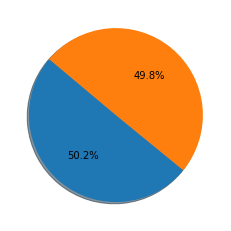

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(percent_by_gender, startangle=140, shadow = True, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
max_time_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values().reset_index().rename(columns={'Timepoint': 'max_timepoint'}))
max_time_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_max_time_df = pd.merge(max_time_df, clean_df, on='Mouse ID')


merge_max_time_df

,Mouse ID,max_timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,t573,0,Ceftamin,Female,15,27,0,45.000000,0
1,u153,0,Ceftamin,Female,11,25,0,45.000000,0
2,d133,0,Zoniferol,Male,5,30,0,45.000000,0
3,n482,0,Propriva,Female,4,29,0,45.000000,0
4,o848,0,Stelasyn,Female,14,27,0,45.000000,0
...,...,...,...,...,...,...,...,...,...
1883,z969,45,Naftisol,Male,9,30,25,63.145652,2
1884,z969,45,Naftisol,Male,9,30,30,65.841013,3
1885,z969,45,Naftisol,Male,9,30,35,69.176246,4
1886,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
final_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
for drug in final_drugs:
    
    temp_merged_df = merge_max_time_df.loc[merge_max_time_df['Drug Regimen'] == drug]
    
    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_merged_df.loc[temp_merged_df['Timepoint'] == temp_merged_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
       
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


([<matplotlib.axis.XTick at 0x1413ad520d0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

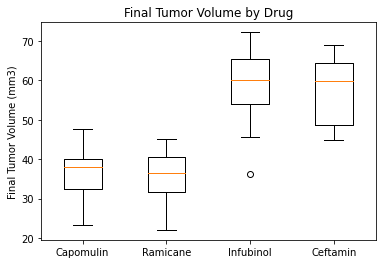

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_values)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

,index,Mouse ID,max_timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,51,w150,10,Capomulin,Male,23,23,0,45.000000,0
1,52,w150,10,Capomulin,Male,23,23,5,39.202129,0
2,53,w150,10,Capomulin,Male,23,23,10,39.952347,0
3,126,r157,15,Capomulin,Male,22,25,0,45.000000,0
4,127,r157,15,Capomulin,Male,22,25,5,45.597064,0
...,...,...,...,...,...,...,...,...,...,...
225,1863,l509,45,Capomulin,Male,17,21,25,44.006257,2
226,1864,l509,45,Capomulin,Male,17,21,30,44.708055,2
227,1865,l509,45,Capomulin,Male,17,21,35,40.207288,2
228,1866,l509,45,Capomulin,Male,17,21,40,40.770813,2


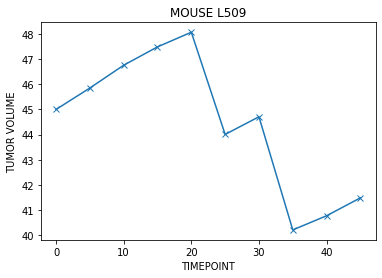

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# find a mouse treated with CAP
cap_mouse = merge_max_time_df.loc[merge_max_time_df["Drug Regimen"] == "Capomulin"].reset_index()

cap_mouse_1 = cap_mouse.loc[cap_mouse["Mouse ID"] == "l509"]
cap_mouse_1

plt.plot(cap_mouse_1["Timepoint"], cap_mouse_1["Tumor Volume (mm3)"], marker = 'x')


plt.xlabel("TIMEPOINT")
plt.ylabel("TUMOR VOLUME")
plt.title("MOUSE L509")

cap_mouse = merge_max_time_df.loc[merge_max_time_df["Drug Regimen"] == "Capomulin"].reset_index()
cap_mouse



In [15]:
cap_mouse

,index,Mouse ID,max_timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,51,w150,10,Capomulin,Male,23,23,0,45.000000,0
1,52,w150,10,Capomulin,Male,23,23,5,39.202129,0
2,53,w150,10,Capomulin,Male,23,23,10,39.952347,0
3,126,r157,15,Capomulin,Male,22,25,0,45.000000,0
4,127,r157,15,Capomulin,Male,22,25,5,45.597064,0
...,...,...,...,...,...,...,...,...,...,...
225,1863,l509,45,Capomulin,Male,17,21,25,44.006257,2
226,1864,l509,45,Capomulin,Male,17,21,30,44.708055,2
227,1865,l509,45,Capomulin,Male,17,21,35,40.207288,2
228,1866,l509,45,Capomulin,Male,17,21,40,40.770813,2


In [16]:
#test for chart above
cap_mouse

,index,Mouse ID,max_timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,51,w150,10,Capomulin,Male,23,23,0,45.000000,0
1,52,w150,10,Capomulin,Male,23,23,5,39.202129,0
2,53,w150,10,Capomulin,Male,23,23,10,39.952347,0
3,126,r157,15,Capomulin,Male,22,25,0,45.000000,0
4,127,r157,15,Capomulin,Male,22,25,5,45.597064,0
...,...,...,...,...,...,...,...,...,...,...
225,1863,l509,45,Capomulin,Male,17,21,25,44.006257,2
226,1864,l509,45,Capomulin,Male,17,21,30,44.708055,2
227,1865,l509,45,Capomulin,Male,17,21,35,40.207288,2
228,1866,l509,45,Capomulin,Male,17,21,40,40.770813,2


In [17]:
# NOT SURE WHY THE SECOND EMPTY CHART IS SHOWING. I WAS HAVING TROUBLE WITH A DIFFERENT VERSION OF THE CODE....?

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mouse_tumor_vol = pd.DataFrame(cap_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
cap_mouse_tumor_vol

# cap_mouse_weight = pd.DataFrame(cap_mouse.groupby('Mouse ID')['Weight (g)'].mean())
# cap_mouse_weight

# cap_mouse_vol_weight = pd.merge(cap_mouse_tumor_vol,cap_mouse_weight, on='Mouse ID')
# cap_mouse_vol_weight

# cap_mouse_vol_weight.plot(kind="scatter", x="Weight (g)", y="avg_tumor_vol", grid=True, figsize=(8,8), title = "AVG TUMOR VOLUME BY WEIGHT")
# plt.show()




# plt.xlabel("WEIGHT (g)")
# plt.ylabel("AVERAGE TUMOR VOLUME (mm3)")
# plt.title('AVERGE TUMOR VOLUME BY WEIGHT')





,Mouse ID,avg_tumor_vol
0,s185,34.559143
1,m601,34.847470
2,x401,36.182040
3,f966,36.505973
4,r554,36.509212
5,y793,38.506829
6,m957,39.049816
7,i738,39.141053
8,t565,39.328725
9,u364,39.887495


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient 

cap_mouse_vol_weight

weight = cap_mouse_vol_weight["Weight (g)"]
tumor_volume = cap_mouse_vol_weight["avg_tumor_vol"]
tumor_volume
print(f"The correlation coefficient between weight and avg tumor volume is {round(stats.pearsonr(weight,tumor_volume)[0],2)}")

#SCATTER PLT CODE FROM ABOVE
cap_mouse_tumor_vol = pd.DataFrame(cap_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
cap_mouse_tumor_vol

cap_mouse_weight = pd.DataFrame(cap_mouse.groupby('Mouse ID')['Weight (g)'].mean())
cap_mouse_weight

cap_mouse_vol_weight = pd.merge(cap_mouse_tumor_vol,cap_mouse_weight, on='Mouse ID')
cap_mouse_vol_weight

#cap_mouse_vol_weight.plot(kind="scatter", x="Weight (g)", y="avg_tumor_vol", grid=True, figsize=(8,8), title = "AVG TUMOR VOLUME BY WEIGHT")
#plt.show()


#CALCULATE linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_volume,weight)

print(f"The r-squared is: {rvalue**2}")
vc_fit = slope * tumor_volume + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(tumor_volume,weight)
plt.plot(tumor_volume,vc_fit,"--")

plt.annotate(line_eq,(40,17),fontsize=15,color="red")


plt.xlabel("WEIGHT (g)")
plt.ylabel("AVERAGE TUMOR VOLUME (mm3)")
plt.title('AVERGE TUMOR VOLUME BY WEIGHT')
plt.show()
# for mouse weight and average tumor volume for the Capomulin regimen


NameError: name 'cap_mouse_vol_weight' is not defined

In [21]:
cap_mouse_vol_weight

NameError: name 'cap_mouse_vol_weight' is not defined